In [1]:
from monomerGating import *
from numpy import array, linspace
from scipy import stats

dt = 1.0e-3
tFinal  = 50.0
noPoints= 20

capRateArr = linspace(0.0, 100.0, noPoints)
branchRateArr = zeros(noPoints)
growthRateArr = zeros(noPoints)
orderParamArr = zeros(noPoints)

for i in range(noPoints):
    n = network(370.0, 20.0, 0.05, 100.0, capRateArr[i])
    n.evolve(dt, tFinal)
    noBranchesArr = array([b for a, b, c in n.noFilaments])
    timeArr = linspace(0.0, n.tElapsed, len(noBranchesArr))
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        timeArr, noBranchesArr)
    branchRateArr[i] = slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        timeArr, n.xEdge)
    growthRateArr[i] = slope
    thetaArr = n.getAngles() / pi * 180
    kde = stats.gaussian_kde(thetaArr)
    orderParamArr[i] = (kde(0) - 0.5 * (kde(35) + kde(-35))) / (
    kde(0) + 0.5 * (kde(35) + kde(-35)))
    del n

Text(0,0.5,'Branching rate (1/s)')

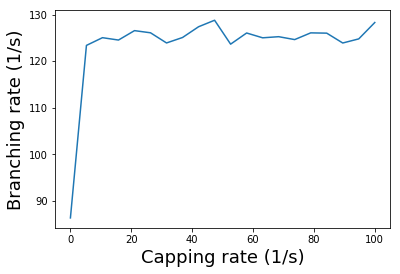

In [2]:
from matplotlib.pyplot import plot, xlabel, ylabel
%matplotlib inline
plot(capRateArr, branchRateArr)
xlabel(r"Capping rate (1/s)", fontsize = 18)
ylabel(r"Branching rate (1/s)", fontsize = 18)

Text(0,0.5,'Growth rate (nm/s)')

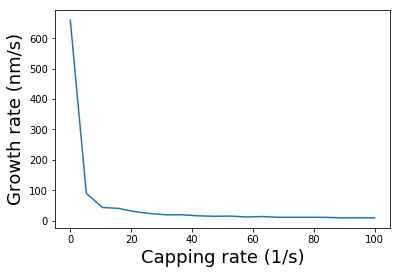

In [3]:
plot(capRateArr, growthRateArr)
xlabel(r"Capping rate (1/s)", fontsize = 18)
ylabel(r"Growth rate (nm/s)", fontsize = 18)

Text(0,0.5,'Order parameter (nm/s)')

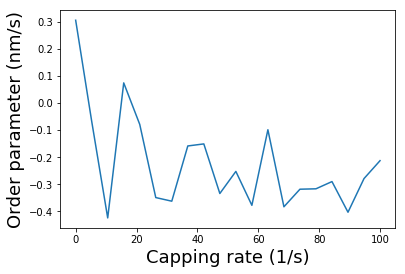

In [4]:
plot(capRateArr, orderParamArr)
xlabel(r"Capping rate (1/s)", fontsize = 18)
ylabel(r"Order parameter (nm/s)", fontsize = 18)